<a href="https://colab.research.google.com/github/AlGhifaryAN/RoboticsTasksTK44G7/blob/main/Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /tmp/Chessman-image-dataset.zip

--2023-12-23 04:02:58--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2023-12-23 04:02:58--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   183MB/s    in 

In [2]:
#ekstrak dataset
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
#melihat direktori dataset
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Pawn', 'Queen', 'Bishop', 'Knight', 'Rook', 'King']

In [4]:
#menghitung jumlah data pada tiap direktori
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))
print('total bishop images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Bishop')))
print('total queen images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Queen')))
print('total rook images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Rook')))

total pawn images : 107
total King images : 76
total Knight images : 106
total bishop images : 87
total queen images : 78
total rook images : 102


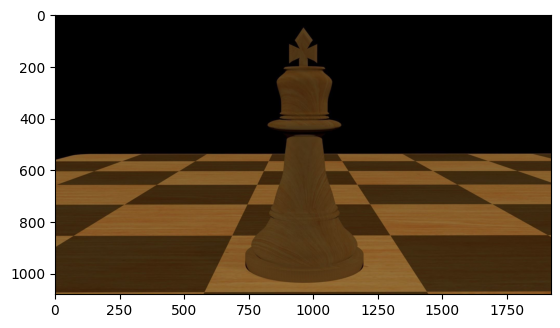

In [5]:
#melihat salah satu sample dataset
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [6]:
#import image generator dan mengaplikasikan augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   validation_split=0.1) #set validation split

In [7]:
#membagi data training dan data testing menggunakan parameter subset 'training'/'validation'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training'
) #set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, #direktori yang sama dengan data train
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [8]:
#arsitektur model 3 layer convolution dan 2 hidden layer; 512 dan 256 unit perseptron
import tensorflow as tf
model = tf.keras.models.Sequential([
    #input shape 150x150 pixel dan 3 bytes warna
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    #flatten the result to feed into a DNN
    tf.keras.layers.Flatten(),
    #512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    #output dengan 1 neuron
    tf.keras.layers.Dense(6, activation='softmax')
])

In [9]:
#optimizer dan loss
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 53s - loss: 1.8135 - accuracy: 0.1784 - val_loss: 1.7871 - val_accuracy: 0.1923 - 53s/epoch - 846ms/step
Epoch 2/50
63/63 - 62s - loss: 1.7877 - accuracy: 0.1804 - val_loss: 1.7805 - val_accuracy: 0.1923 - 62s/epoch - 979ms/step
Epoch 3/50
63/63 - 49s - loss: 1.7847 - accuracy: 0.1683 - val_loss: 1.7749 - val_accuracy: 0.1923 - 49s/epoch - 777ms/step
Epoch 4/50
63/63 - 61s - loss: 1.7343 - accuracy: 0.2425 - val_loss: 1.7811 - val_accuracy: 0.1731 - 61s/epoch - 961ms/step
Epoch 5/50
63/63 - 48s - loss: 1.7526 - accuracy: 0.2505 - val_loss: 1.7627 - val_accuracy: 0.3077 - 48s/epoch - 756ms/step
Epoch 6/50
63/63 - 49s - loss: 1.7157 - accuracy: 0.2725 - val_loss: 1.7580 - val_accuracy: 0.2692 - 49s/epoch - 772ms/step
Epoch 7/50
63/63 - 49s - loss: 1.6732 - accuracy: 0.2966 - val_loss: 1.7501 - val_accuracy: 0.2115 - 49s/epoch - 779ms/step
Epoch 8/50
63/63 - 49s - loss: 1.6449 - accuracy: 0.3066 - val_loss: 1.6883 - val_accuracy: 0.2885 - 49s/epoch - 775ms/step
Epoch 9/

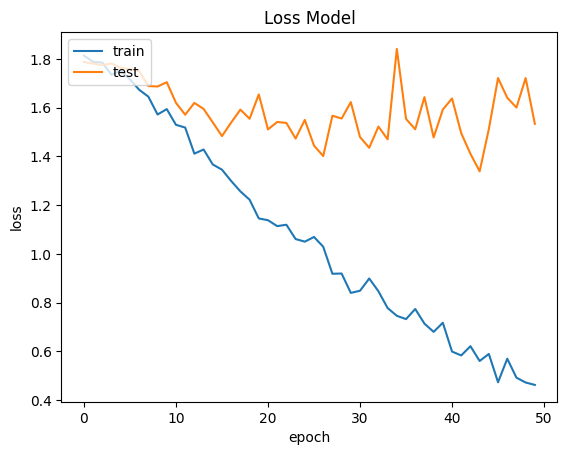

In [11]:
#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

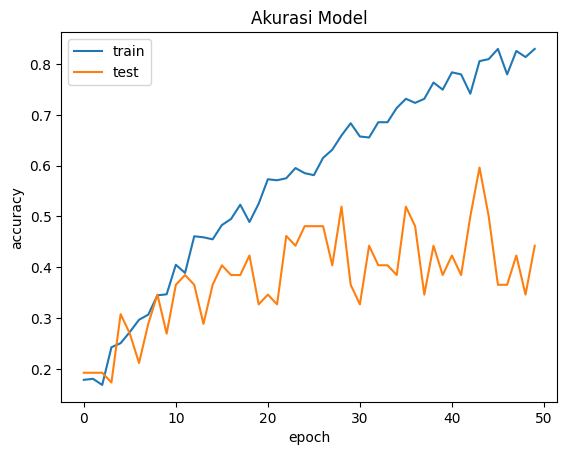

In [12]:
#plot akurasi
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()